# Linear Regression

### Equation of Line
``ŷ = m * x + c`` <br>
where m is slope and c is the intercept. <br />
for multiple features this eqn can be extended into: <br />
``ŷ = m0 * x0 + m1 * x1 + m2 * x2...mn * xn + c``

### Mean squared error (MSE)
Mean squared error (MSE) is a common metric used to evaluate the accuracy of a regression model. It measures the average of the squared differences between the predicted values and the actual values. A lower MSE indicates a better fit of the model to the data. <br />
``MSE = 1/n * ∑(y - ŷ)²``

### Gradient Descent
Gradient descent algorithm is used to fit line in a optimized way. The algorithm works by starting with some initial values for the model parameters, and then iteratively adjusting these values in the direction of the steepest descent of the cost function(MSE). The adjustment is made by subtracting the gradient of the cost function with respect to the model parameters from the current values of the parameters. This process is repeated until the cost function is minimized or a stopping criterion is met. <br />

Partial dervative of MSE w.r.t.m <br />
``∂/∂m = -2/n * ∑(y - ŷ) * x`` <br />
Partial dervative of MSE w.r.t.c <br />
``∂/∂c = -2/n * ∑(y - ŷ)`` <br />
<br />
``new m = m - learning rate * ∂/∂m`` <br />
``new c = c - learning rate * ∂/∂c`` <br />
learning rate is used to adjust how agressive we take step. usually it is very small number like 0.001 <br />
We continue finding new m & c for several iterations until we get minimum error.

In [18]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.001, iteration=1000):
        self.learning_rate = learning_rate
        self.iteration = iteration
        self.m = None
        self.c = None
        
    def predict(self, x):
        # return self.m * x + self.c
        return np.dot(x, self.m) + self.c
    
    def mse(self, y, y_predicted):
        return np.mean((y - y_predicted) ** 2)
    
    def fit(self, x, y):
        self.m = np.zeros(x.shape[1])
        self.c = 0
        n = len(x)
        
        for i in range(self.iteration):
            y_predicted = self.predict(x)
            cost = self.mse(y, y_predicted)
            
            # dm = -(2 / n) * np.sum(x * (y - y_predicted))
            dm = -(2 / n) * np.dot(x.T, (y - y_predicted))
            dc = -(2 / n) * np.sum(y - y_predicted)
            
            self.m -= self.learning_rate * dm
            self.c -= self.learning_rate * dc
            
        print(f"m={self.m}, c={self.c}, cost={cost}, iteration={i}")

## Train

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

x, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

model = LinearRegression(learning_rate=0.01, iteration=1000)
model.fit(x_train, y_train)

m=[75.05935135], c=-0.14241604361822527, cost=286.38301931945614, iteration=999


## Plot Train

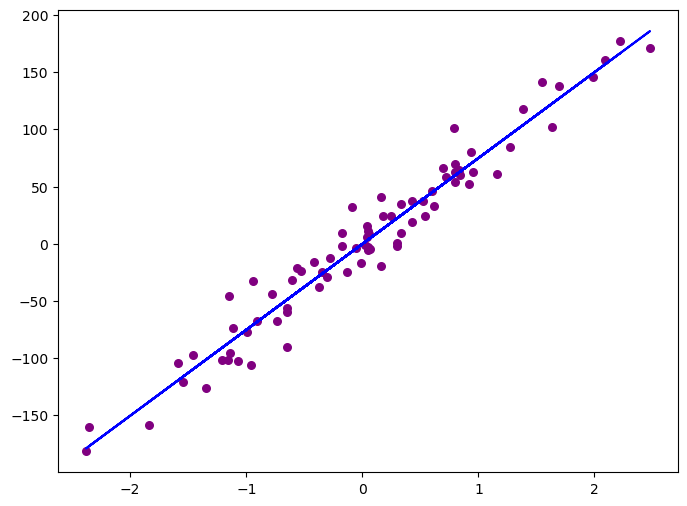

In [20]:
import matplotlib.pyplot as plt

p_train = model.predict(x_train)
fig = plt.figure(figsize=(8,6))
plt.scatter(x_train[:,0], y_train, color="purple", marker="o", s=30)
plt.plot(x_train, p_train, color="blue")
plt.plot()
plt.show()

## Plot Test

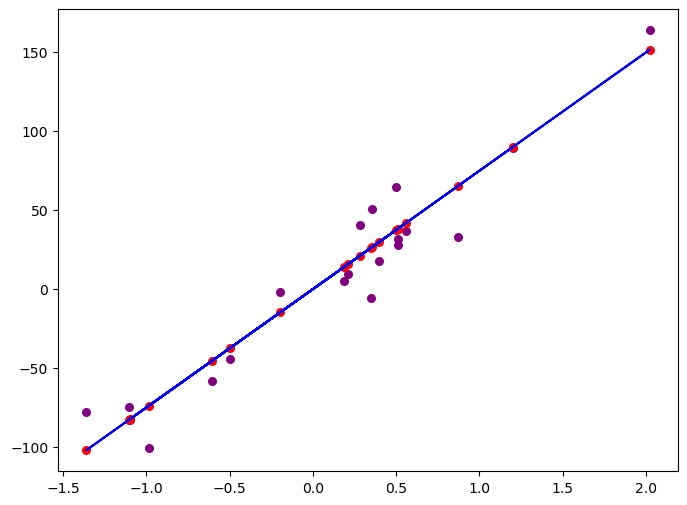

In [21]:
p_test = model.predict(x_test)
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color="purple", marker="o", s=30)
plt.scatter(x_test, p_test, color="red", marker="o", s=30)
plt.plot(x_test, p_test, color="blue")
plt.plot()
plt.show()

In [22]:
model.predict(0.8)

array([59.90506504])